## 연립다세대

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
town_house = pd.read_csv('D:/SDC_project/townhouse.csv')
town_house

,NO,시군구,번지,본번,부번,건물명,전월세구분,전용면적(㎡),계약년월,계약일,...,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,연도,월
0,70835,서울특별시 중랑구 상봉동,107-30,107,30,동일캐슬108동,전세,25.91,202306,23,...,2023,면목로92가길 4,202307~202507,신규,-,NaN,NaN,연립다세대,2023,6
1,70834,서울특별시 성북구 정릉동,394-1,394,1,삼성그린빌라,전세,29.61,202306,23,...,2018,보국문로11길 28-7,202307~202507,갱신,-,"21,000",0.0,연립다세대,2023,6
2,70828,서울특별시 중랑구 면목동,543-28,543,28,예인하우스,전세,17.54,202306,23,...,2023,면목로65길 27,202308~202508,신규,-,NaN,NaN,연립다세대,2023,6
3,70827,서울특별시 성북구 장위동,238-177,238,177,우림빌라,전세,59.64,202306,23,...,1991,장위로31길 16,202307~202507,신규,-,NaN,NaN,연립다세대,2023,6
4,70826,서울특별시 송파구 석촌동,218-10,218,10,(218-10),전세,40.80,202306,23,...,2002,삼학사로6길 13,202307~202507,갱신,-,"15,750",0.0,연립다세대,2023,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104664,26,서울특별시 용산구 효창동,127-10,127,10,127-10,전세,27.94,202412,31,...,2017,효창원로69가길 28,202503~202703,갱신,-,"23,100",0.0,연립다세대,2024,12
104665,24,서울특별시 용산구 이태원동,180-21,180,21,그린빌라,전세,91.71,202412,31,...,1994,보광로55길 15,202502~202702,신규,-,NaN,NaN,연립다세대,2024,12
104666,23,서울특별시 광진구 중곡동,231-5,231,5,그린나래,전세,30.00,202412,31,...,2022,면목로 119,202504~202703,갱신,-,"7,200",0.0,연립다세대,2024,12
104667,16,서울특별시 성동구 성수동2가,299-82,299,82,에덴빌,전세,14.04,202412,31,...,2014,광나루로4길 6,202502~202602,신규,-,NaN,NaN,연립다세대,2024,12


In [4]:
town_house['계약구분'].value_counts()

계약구분
신규    67109
갱신    28758
-      8802
Name: count, dtype: int64

In [5]:
town_house['종전계약 보증금(만원)'] = town_house['종전계약 보증금(만원)'].fillna(0)

In [6]:
town_house['계약구분'] = town_house['계약구분'].replace('-', '신규')
town_house['계약구분'].value_counts()

계약구분
신규    75911
갱신    28758
Name: count, dtype: int64

In [8]:
town_house = town_house[town_house['계약구분']=='신규']

In [9]:
town_house['구'] = town_house['시군구'].str.extract(r'(\S+구)')
town_house

C:\Users\emily\AppData\Local\Temp\ipykernel_20320\1475232886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  town_house['구'] = town_house['시군구'].str.extract(r'(\S+구)')


,NO,시군구,번지,본번,부번,건물명,전월세구분,전용면적(㎡),계약년월,계약일,...,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,연도,월,구
0,70835,서울특별시 중랑구 상봉동,107-30,107,30,동일캐슬108동,전세,25.91,202306,23,...,면목로92가길 4,202307~202507,신규,-,0,NaN,연립다세대,2023,6,중랑구
2,70828,서울특별시 중랑구 면목동,543-28,543,28,예인하우스,전세,17.54,202306,23,...,면목로65길 27,202308~202508,신규,-,0,NaN,연립다세대,2023,6,중랑구
3,70827,서울특별시 성북구 장위동,238-177,238,177,우림빌라,전세,59.64,202306,23,...,장위로31길 16,202307~202507,신규,-,0,NaN,연립다세대,2023,6,성북구
5,70825,서울특별시 송파구 석촌동,164-1,164,1,(164-1),전세,19.69,202306,23,...,백제고분로37가길 25,-,신규,-,0,NaN,연립다세대,2023,6,송파구
6,70824,서울특별시 송파구 석촌동,229-16,229,16,(229-16),전세,45.76,202306,23,...,삼학사로6길 25,-,신규,-,0,NaN,연립다세대,2023,6,송파구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104659,72,서울특별시 은평구 녹번동,126-33,126,33,라임하우스,전세,29.49,202412,31,...,녹번로3가길 28-1,202503~202703,신규,-,0,NaN,연립다세대,2024,12,은평구
104662,51,서울특별시 동대문구 장안동,317-4,317,4,동성골드리버,전세,47.77,202412,31,...,장안벚꽃로3길 28,202502~202702,신규,-,0,NaN,연립다세대,2024,12,동대문구
104663,47,서울특별시 중랑구 면목동,616-33,616,33,행운빌딩,전세,18.20,202412,31,...,면목로42길 11,202502~202702,신규,-,0,NaN,연립다세대,2024,12,중랑구
104665,24,서울특별시 용산구 이태원동,180-21,180,21,그린빌라,전세,91.71,202412,31,...,보광로55길 15,202502~202702,신규,-,0,NaN,연립다세대,2024,12,용산구


In [13]:
town_house_count = town_house['구'].value_counts().reset_index(name='거래건수')
town_house_count

,구,거래건수
0,송파구,6466
1,강서구,5965
2,은평구,5393
3,마포구,4400
4,광진구,4199
5,강동구,4036
6,서초구,3967
7,용산구,3880
8,강남구,3620
9,양천구,3590


In [10]:
seoul_map = pd.read_excel('D:/SDC_project/data_yena/서울시_행정동_좌표.xlsx')
seoul_map

,code,sido,gu,dong,lat,lng
0,1111051500,서울특별시,종로구,청운효자동,37.584009,126.970626
1,1111053000,서울특별시,종로구,사직동,37.575408,126.965944
2,1111054000,서울특별시,종로구,삼청동,37.590758,126.980996
3,1111055000,서울특별시,종로구,부암동,37.594768,126.965574
4,1111056000,서울특별시,종로구,평창동,37.613029,126.974485
...,...,...,...,...,...,...
886,1174010600,서울특별시,강동구,둔촌동,37.531157,127.142891
887,1174010700,서울특별시,강동구,암사동,37.552497,127.133010
888,1174010800,서울특별시,강동구,성내동,37.531338,127.129174
889,1174010900,서울특별시,강동구,천호동,37.543676,127.131748


In [12]:
seoul_map = seoul_map.rename(columns={'gu':'구','dong':'동','lat':'위도','lng':'경도'})
seoul_map

,code,sido,구,동,위도,경도
0,1111051500,서울특별시,종로구,청운효자동,37.584009,126.970626
1,1111053000,서울특별시,종로구,사직동,37.575408,126.965944
2,1111054000,서울특별시,종로구,삼청동,37.590758,126.980996
3,1111055000,서울특별시,종로구,부암동,37.594768,126.965574
4,1111056000,서울특별시,종로구,평창동,37.613029,126.974485
...,...,...,...,...,...,...
886,1174010600,서울특별시,강동구,둔촌동,37.531157,127.142891
887,1174010700,서울특별시,강동구,암사동,37.552497,127.133010
888,1174010800,서울특별시,강동구,성내동,37.531338,127.129174
889,1174010900,서울특별시,강동구,천호동,37.543676,127.131748


In [14]:
gu_coords_df = seoul_map[['구','위도','경도']]
combined_with_coords = pd.merge(town_house_count, gu_coords_df, on=['구'], how='left')
combined_with_coords

,구,거래건수,위도,경도
0,송파구,6466,37.538055,127.122215
1,송파구,6466,37.528779,127.116814
2,송파구,6466,37.496923,127.143302
3,송파구,6466,37.493534,127.146891
4,송파구,6466,37.496025,127.149894
...,...,...,...,...
886,중구,871,37.567411,126.968642
887,중구,871,37.558715,126.965840
888,중구,871,37.559382,126.969985
889,중구,871,37.556408,126.967319


In [15]:
combined_with_coords.to_csv('combined_coords_townhouse.csv')

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt

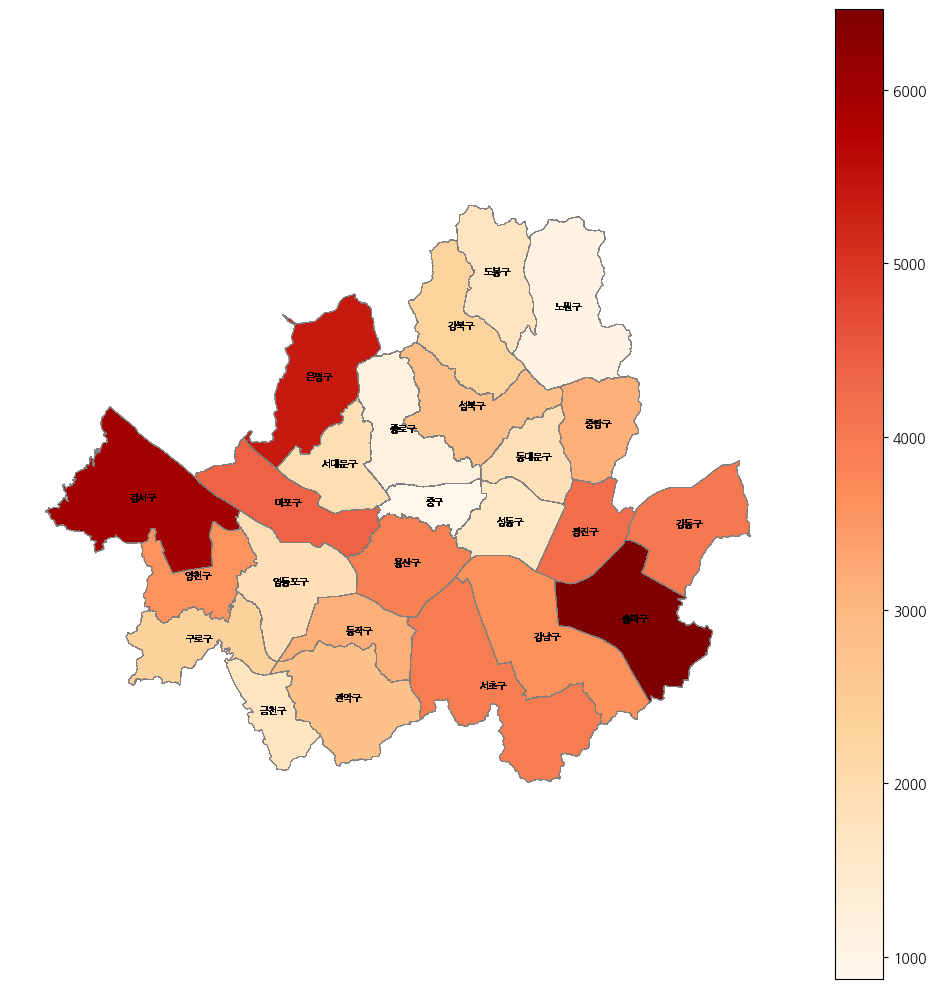

In [17]:
df = pd.read_csv('D:/SDC_project/combined_coords_townhouse.csv')  

# 2. 서울 구 경계 지도 불러오기
# shp 또는 geojson 파일 필요 (서울시 행정구역 경계)
seoul_gu = gpd.read_file('D:/SDC_project/data_yena/sig_20230729/sig.shp',encoding="cp949") 
seoul_gu = seoul_gu[seoul_gu['SIG_CD'].str.startswith('11')]

merged = seoul_gu.merge(df, left_on='SIG_KOR_NM', right_on='구')  

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.boundary.plot(ax=ax, color='gray', linewidth=0.3) 
merged.plot(column='거래건수', ax=ax, legend=True, cmap='OrRd', edgecolor='white', linewidth=0.3)

for idx, row in merged.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['구'],
             ha='center', fontsize=7, color='black')

plt.axis('off')
plt.tight_layout()
plt.savefig('seoul_townhouse_by_gu_clean.png', dpi=300, bbox_inches='tight')
plt.show()